# Modeling Lake Huron data 4 different ways
## Direct ARMA fit (assuming stationarity)

In [1]:
library(forecast)
source('https://nmimoto.github.io/R/TS-00.txt')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




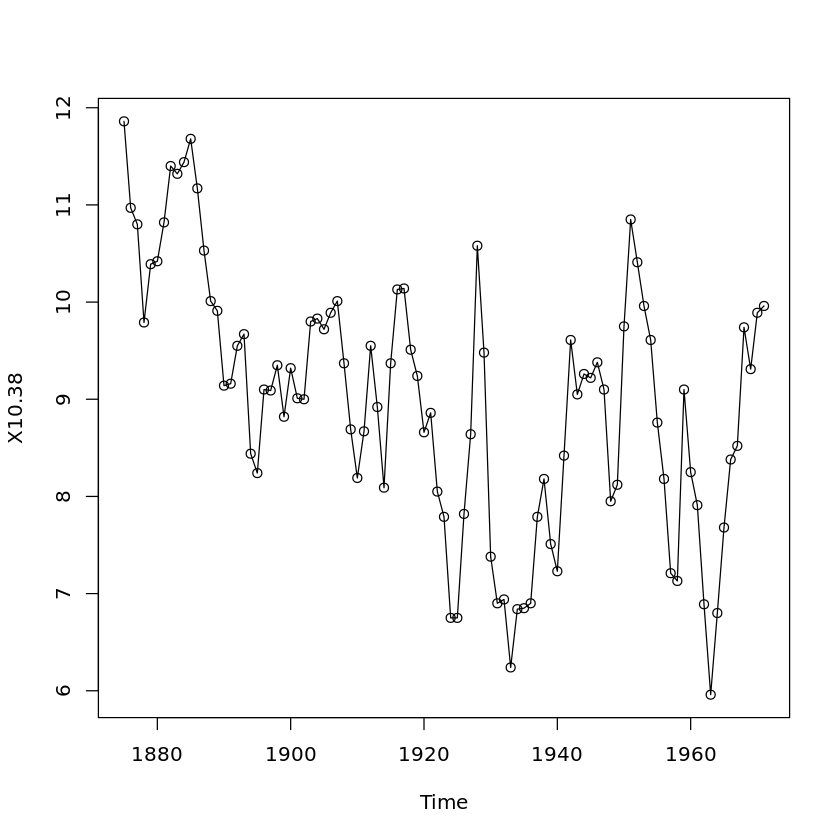

In [2]:
D <- read.csv('https://nmimoto.github.io/datasets/lake.csv')
Lake <- ts(D, start=1875, freq=1)
plot(Lake, type="o")

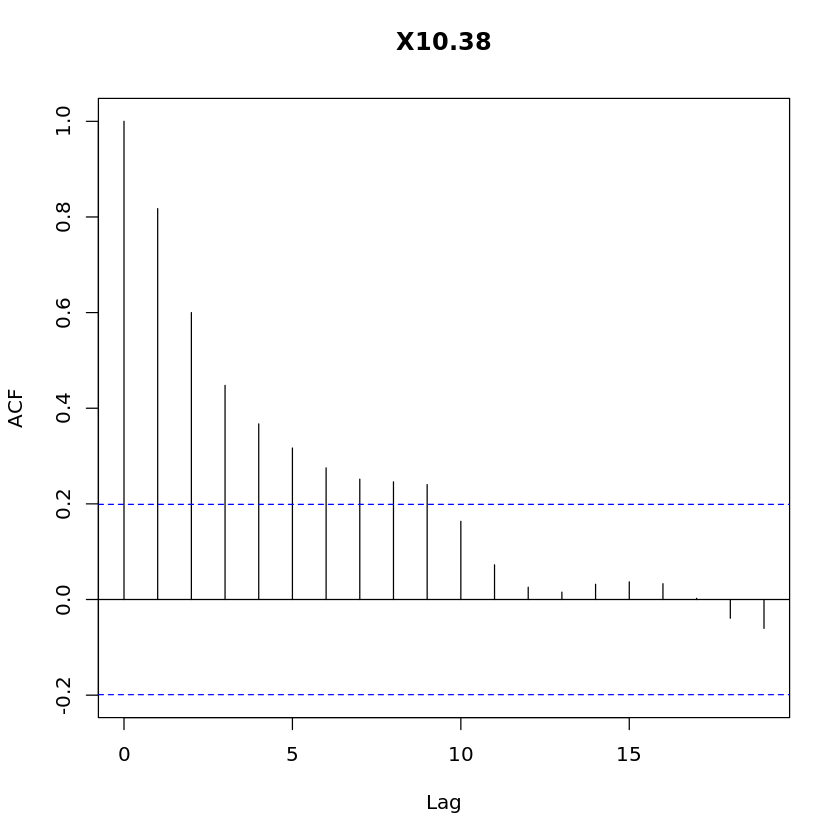

In [3]:
acf(Lake)

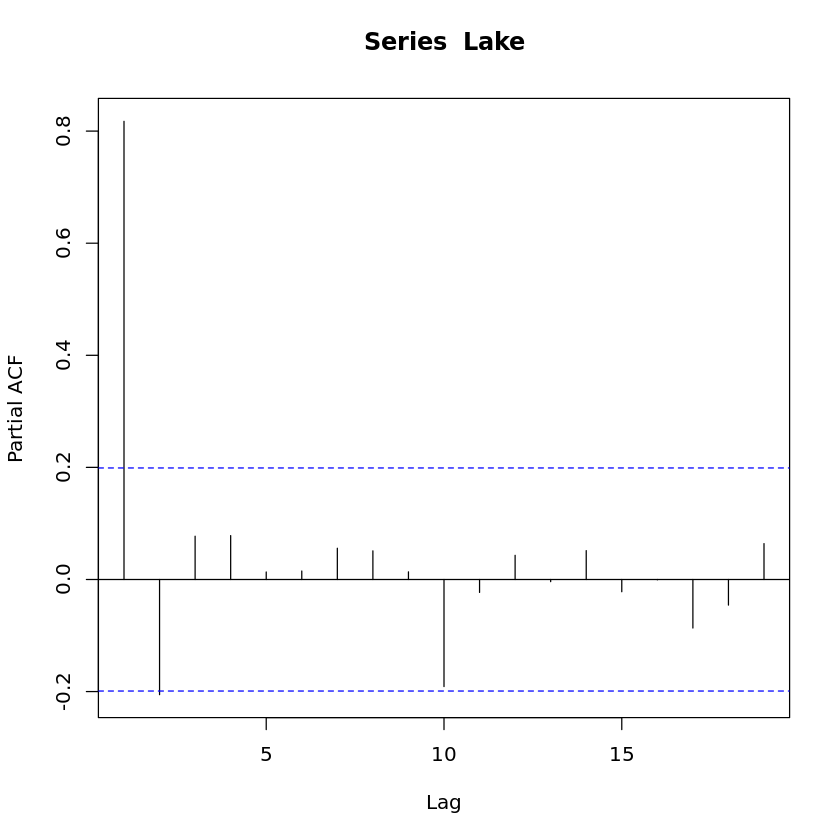

In [4]:
pacf(Lake)

In [5]:
Stationarity.tests(Lake)

Warning message in kpss.test(A):
“p-value smaller than printed p-value”


,KPSS,ADF,PP
p-val:,0.01,0.24,0.025


In [7]:
# find best ARMA(p,q) by AICc
Fit1 <- auto.arima(Lake, d=0, stepwise = FALSE, approximation=FALSE)
Fit1

Series: Lake 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1    mean
      0.7665  0.3393  9.1290
s.e.  0.0773  0.1123  0.3861

sigma^2 estimated as 0.4784:  log likelihood=-101.09
AIC=210.18   AICc=210.62   BIC=220.48

  B-L test H0: the sereis is uncorrelated
  M-L test H0: the square of the sereis is uncorrelated
  J-B test H0: the sereis came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.963,0.952,0.934,0.567,0.641,0.89,0.684


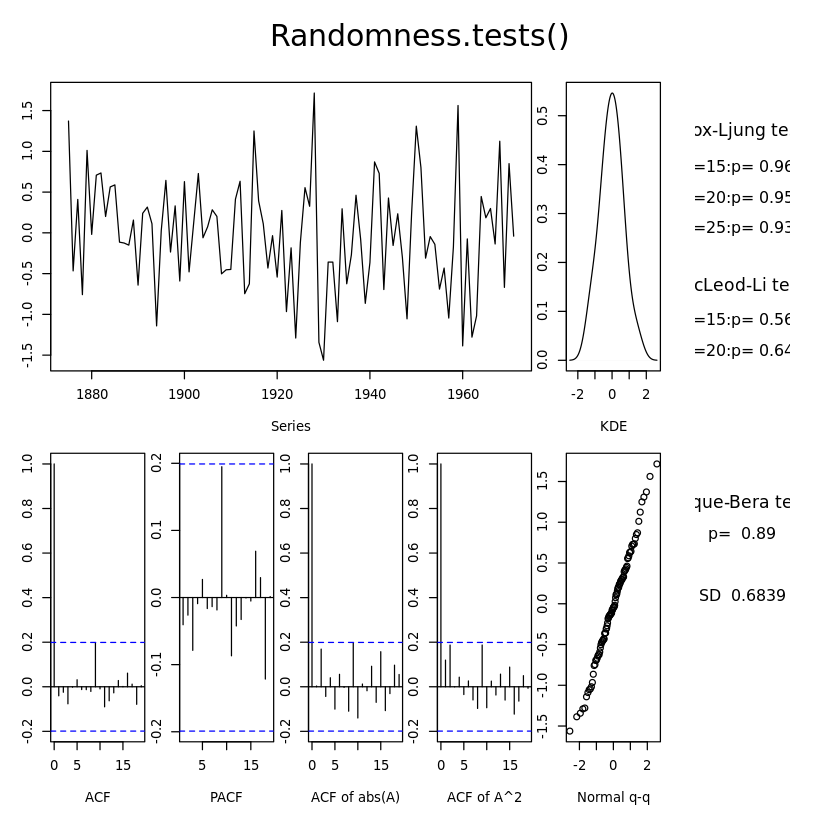

In [8]:
Randomness.tests(Fit1$residuals)

## Forcing Linear Trend

In [10]:
Reg2 <- lm(Lake~time(Lake))
summary(Reg2)


Call:
lm(formula = Lake ~ time(Lake))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.50919 -0.74760 -0.01556  0.75966  2.53409 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 55.278141   7.922614   6.977 4.02e-10 ***
time(Lake)  -0.024071   0.004119  -5.843 7.16e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.136 on 95 degrees of freedom
Multiple R-squared:  0.2644,	Adjusted R-squared:  0.2566 
F-statistic: 34.14 on 1 and 95 DF,  p-value: 7.165e-08


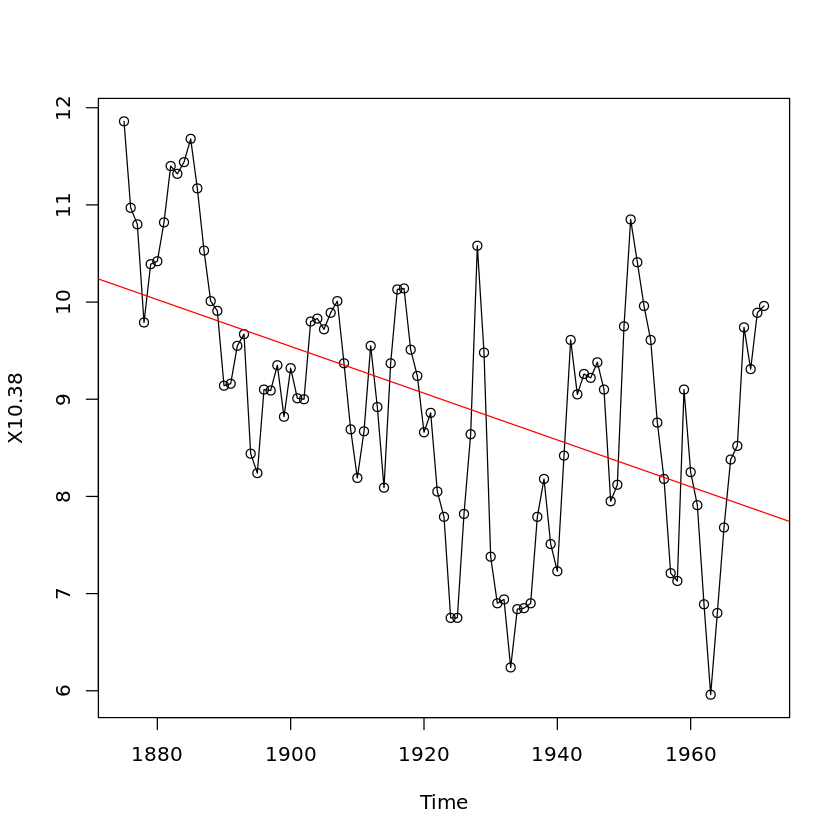

In [11]:
plot(Lake, type="o")
abline(Reg2, col="red")

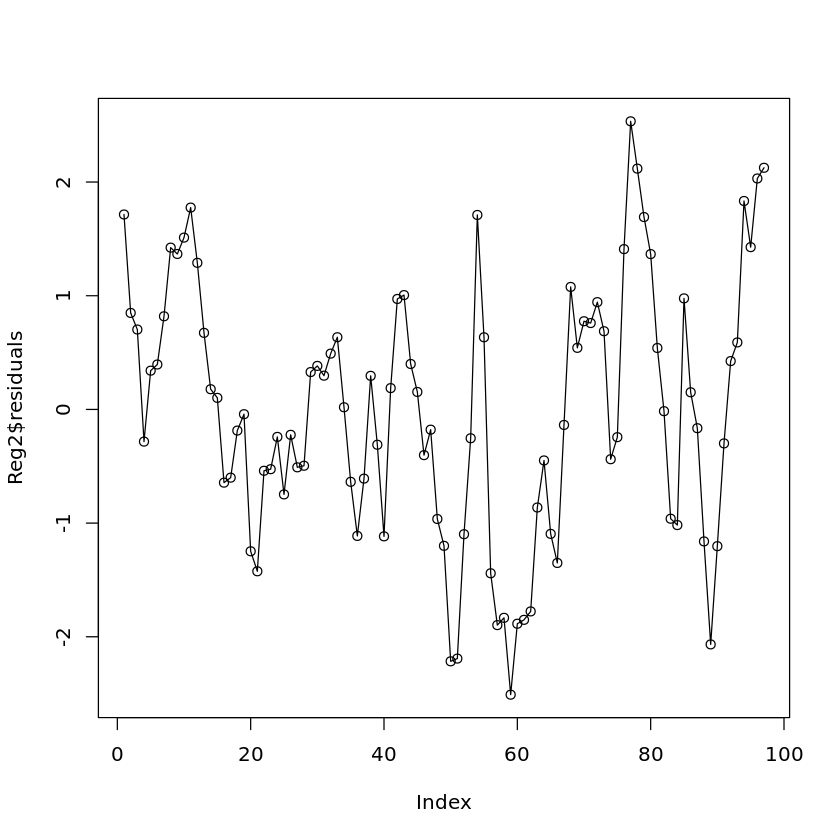

In [12]:
plot(Reg2$residuals, type="o")

In [13]:
Fit2 <- auto.arima(Reg2$residuals, d=0, stepwise = FALSE, approximation = FALSE)
Fit2

Series: Reg2$residuals 
ARIMA(1,0,1) with zero mean 

Coefficients:
         ar1     ma1
      0.6671  0.3827
s.e.  0.0937  0.1135

sigma^2 estimated as 0.452:  log likelihood=-98.72
AIC=203.44   AICc=203.7   BIC=211.16

  B-L test H0: the sereis is uncorrelated
  M-L test H0: the square of the sereis is uncorrelated
  J-B test H0: the sereis came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.985,0.974,0.969,0.19,0.189,0.782,0.669


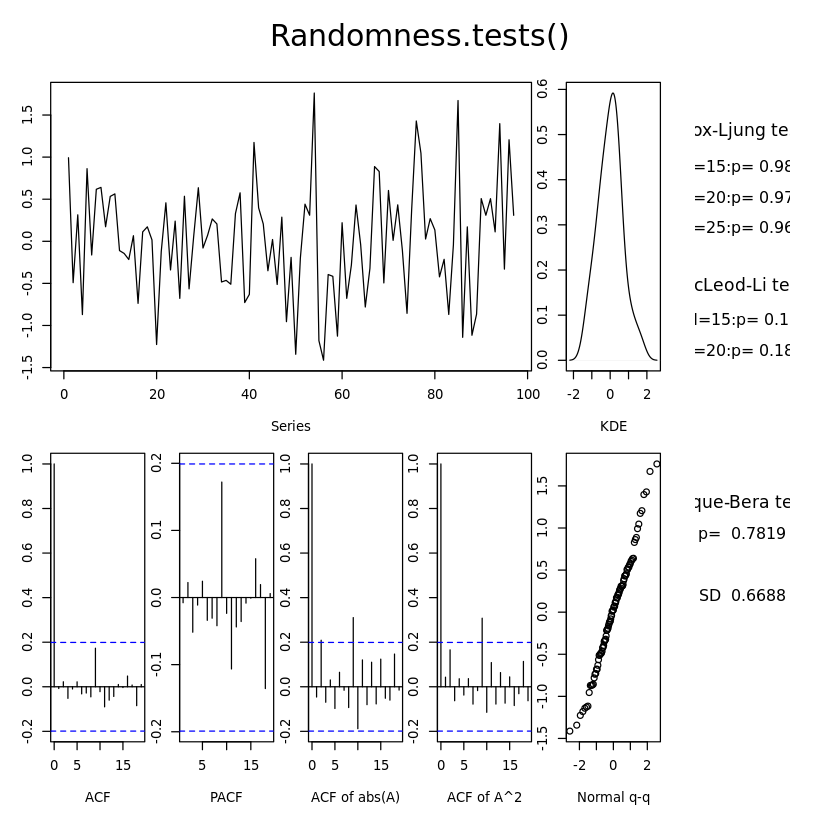

In [14]:
Randomness.tests(Fit2$resid)

## Box-Cox Differencing (ARIMA modeling)

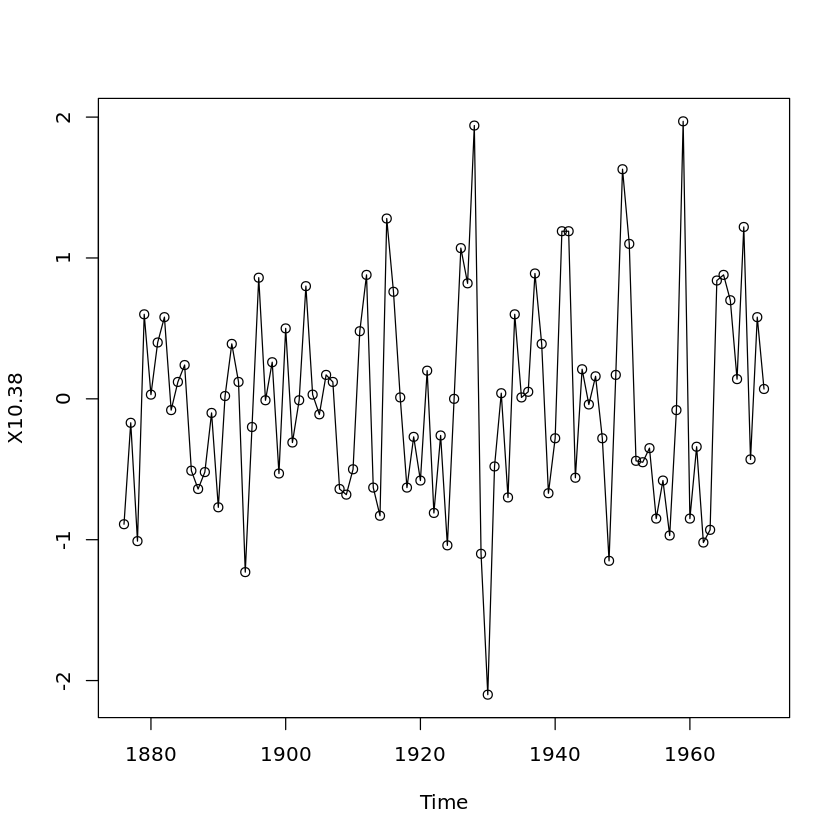

In [16]:
diff.Y <- diff(Lake)
plot(diff.Y, type="o")

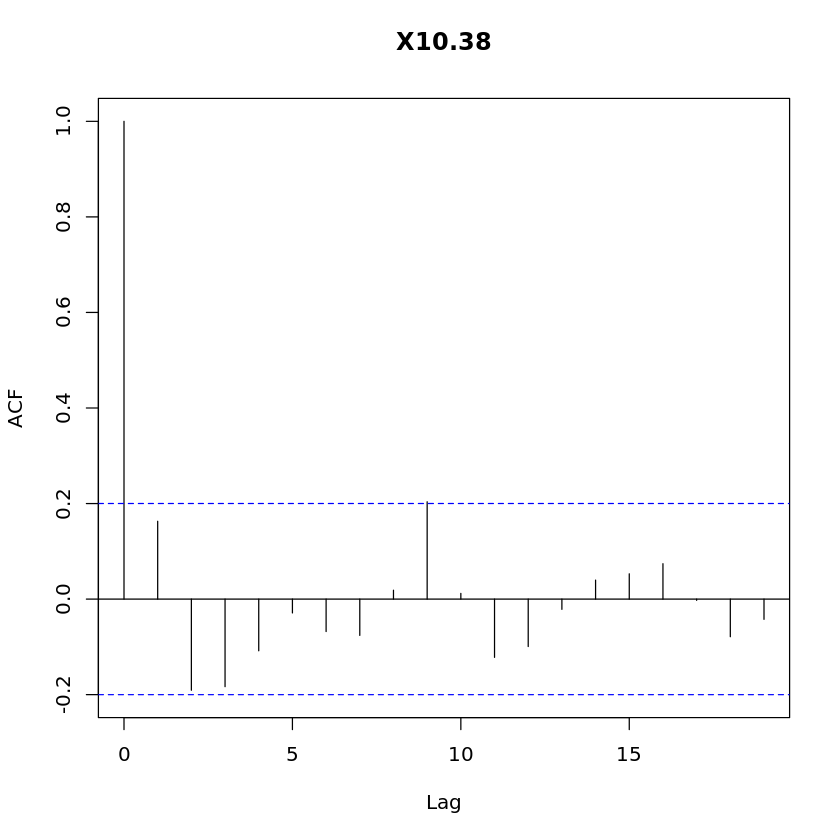

In [17]:
acf(diff.Y)

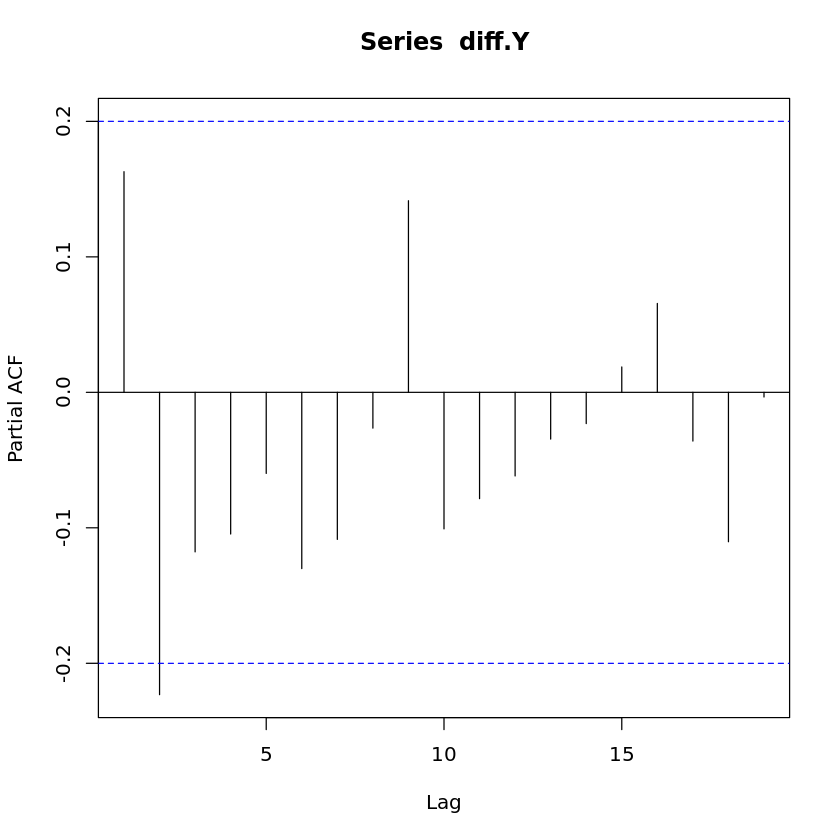

In [18]:
pacf(diff.Y)

In [19]:
Stationarity.tests(diff.Y)

Warning message in adf.test(A):
“p-value smaller than printed p-value”
Warning message in pp.test(A):
“p-value smaller than printed p-value”
Warning message in kpss.test(A):
“p-value greater than printed p-value”


,KPSS,ADF,PP
p-val:,0.1,0.01,0.01


In [20]:
Fit3 <- auto.arima(diff.Y, d=0, stepwise = FALSE, approximation = FALSE)
Fit3

Series: diff.Y 
ARIMA(1,0,2) with zero mean 

Coefficients:
         ar1      ma1      ma2
      0.6385  -0.5349  -0.3514
s.e.  0.1345   0.1445   0.1055

sigma^2 estimated as 0.4812:  log likelihood=-99.88
AIC=207.76   AICc=208.2   BIC=218.02

  B-L test H0: the sereis is uncorrelated
  M-L test H0: the square of the sereis is uncorrelated
  J-B test H0: the sereis came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.981,0.958,0.946,0.551,0.545,0.575,0.681


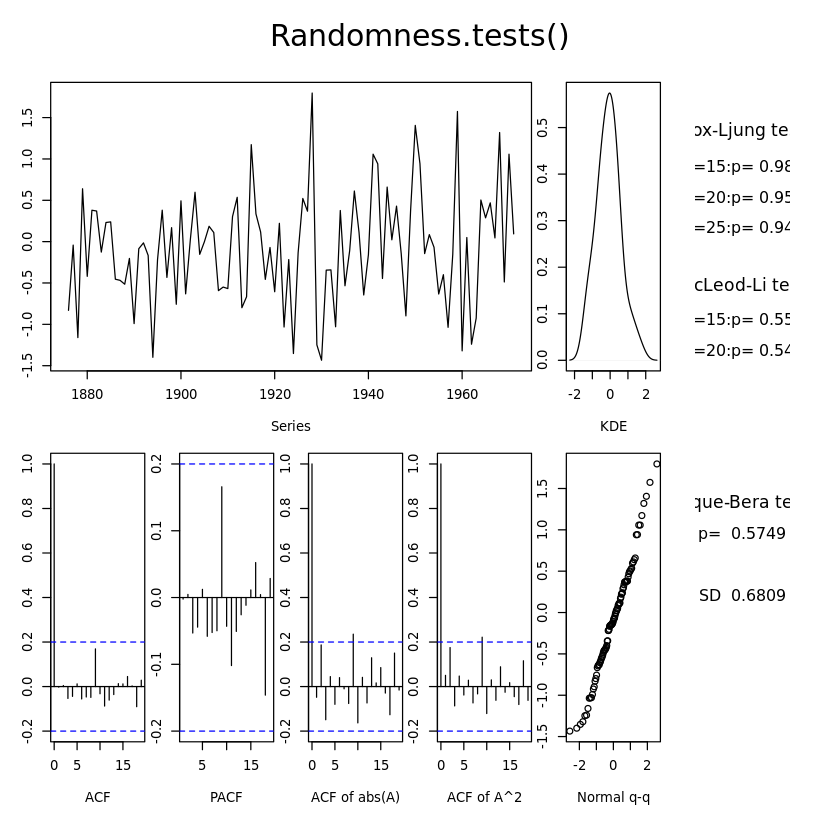

In [21]:
Randomness.tests(Fit3$residuals)

In [22]:
# Exactly same as above
Fit3b <- Arima(Lake, order=c(1,1,2), include.mean=FALSE)
Fit3b

Series: Lake 
ARIMA(1,1,2) 

Coefficients:
         ar1      ma1      ma2
      0.6385  -0.5349  -0.3514
s.e.  0.1345   0.1445   0.1055

sigma^2 estimated as 0.4812:  log likelihood=-99.88
AIC=207.76   AICc=208.2   BIC=218.02

  B-L test H0: the sereis is uncorrelated
  M-L test H0: the square of the sereis is uncorrelated
  J-B test H0: the sereis came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.979,0.956,0.942,0.524,0.495,0.577,0.677


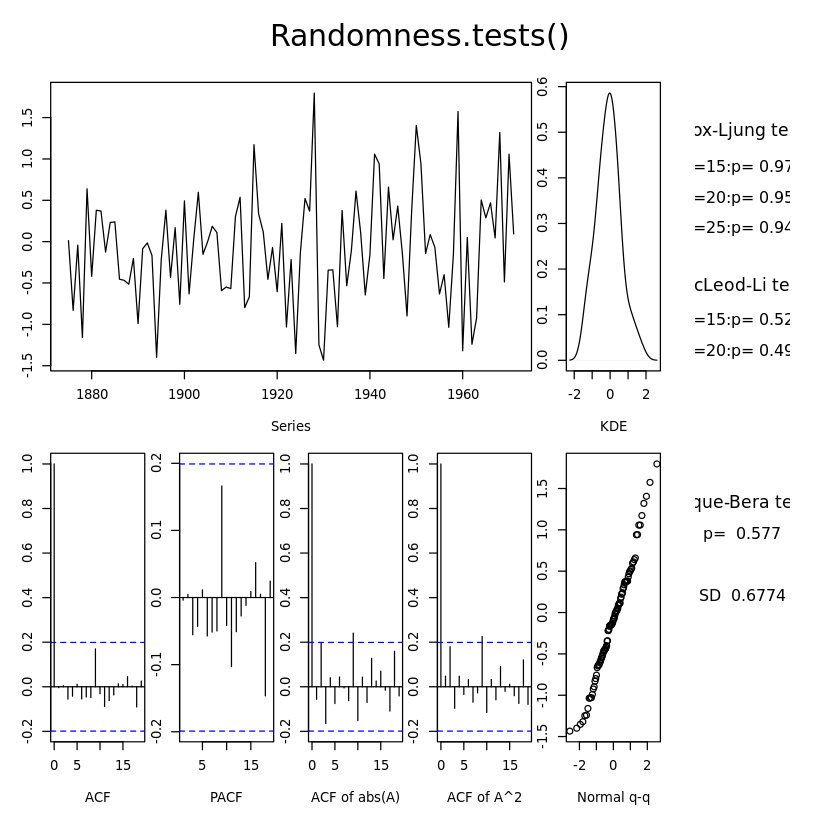

In [23]:
Randomness.tests(Fit3b$residuals)